# WALMART SALES PERFORMANCE ANALYSIS

Load and Merge Data

In [ ]:
import pandas as pd

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/Data Analytics Projects/features.csv')
stores = pd.read_csv('/content/drive/MyDrive/Data Analytics Projects/stores.csv')
train = pd.read_csv('/content/drive/MyDrive/Data Analytics Projects/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Data Analytics Projects/test.csv')

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
# Convert date to datetime
for df in [features, train, test]:
    df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Merge store info into train set
train_df = train.merge(features, on=['Store', 'Date'], how='left')
train_df = train_df.merge(stores, on='Store', how='left')

In [ ]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [ ]:
train_df.shape

(421570, 17)

#  Data Cleaning & Feature Engineering

In [ ]:
# check for duplicates

train_df.duplicated().sum()

np.int64(0)

In [ ]:
train_df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [ ]:
markdown_cols = [col for col in train_df.columns if 'MarkDown' in col]

In [ ]:
train_df[markdown_cols] = train_df[markdown_cols].fillna(0)

In [ ]:
train_df[markdown_cols].isnull().sum()

,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0
MarkDown5,0


In [ ]:
# Create time features
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Week'] = train_df['Date'].dt.isocalendar().week

# EXPLORATORY DATA ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set plot style
sns.set(style="whitegrid")

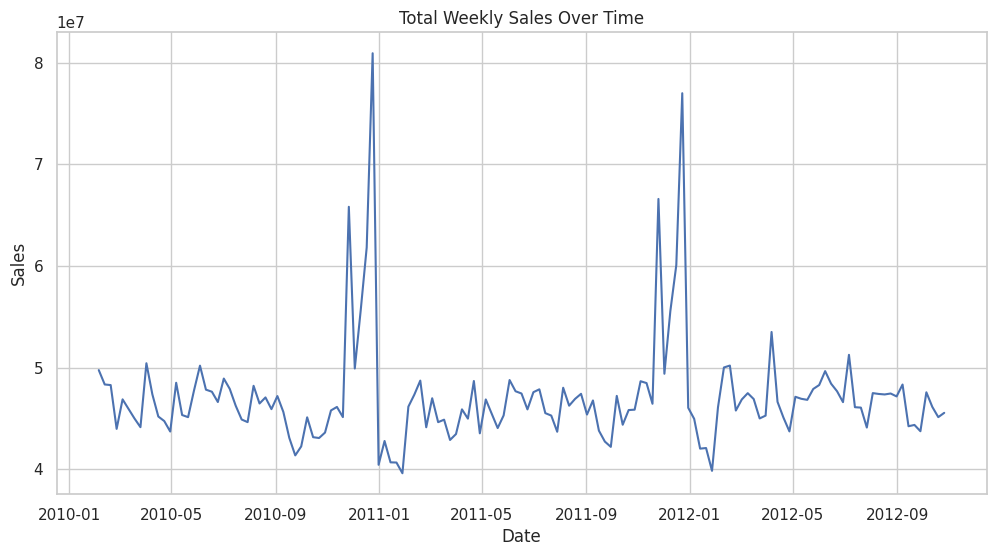

In [ ]:
# Sales Trend Over Time

weekly_sales = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_sales, x='Date', y='Weekly_Sales')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.savefig("total_weekly.png", bbox_inches='tight', dpi=300)
plt.show()

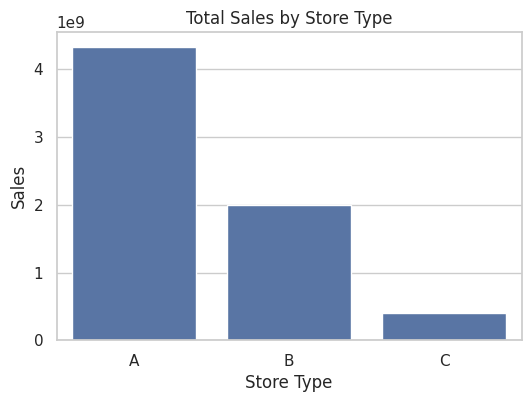

In [ ]:
# Sales by Store Type

store_type_sales = train_df.groupby('Type')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=store_type_sales, x='Type', y='Weekly_Sales')
plt.title('Total Sales by Store Type')
plt.ylabel('Sales')
plt.xlabel('Store Type')
plt.savefig("total_sales.png", bbox_inches='tight', dpi=300)
plt.show()

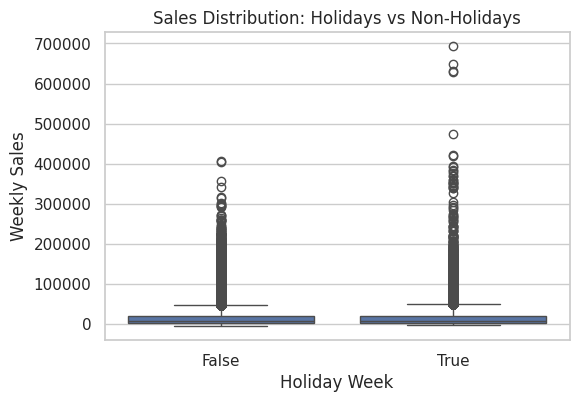

In [ ]:
# Sales During Holidays vs Non-Holidays

plt.figure(figsize=(6, 4))
sns.boxplot(data=train_df, x='IsHoliday_x', y='Weekly_Sales')
plt.title('Sales Distribution: Holidays vs Non-Holidays')
plt.xlabel('Holiday Week')
plt.ylabel('Weekly Sales')
plt.savefig("sales_distribution.png", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-52-3128799301.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_sales, x='Store', y='Weekly_Sales', palette='viridis')
/tmp/ipython-input-52-3128799301.py:7: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.savefig("sales_by_store.png", bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


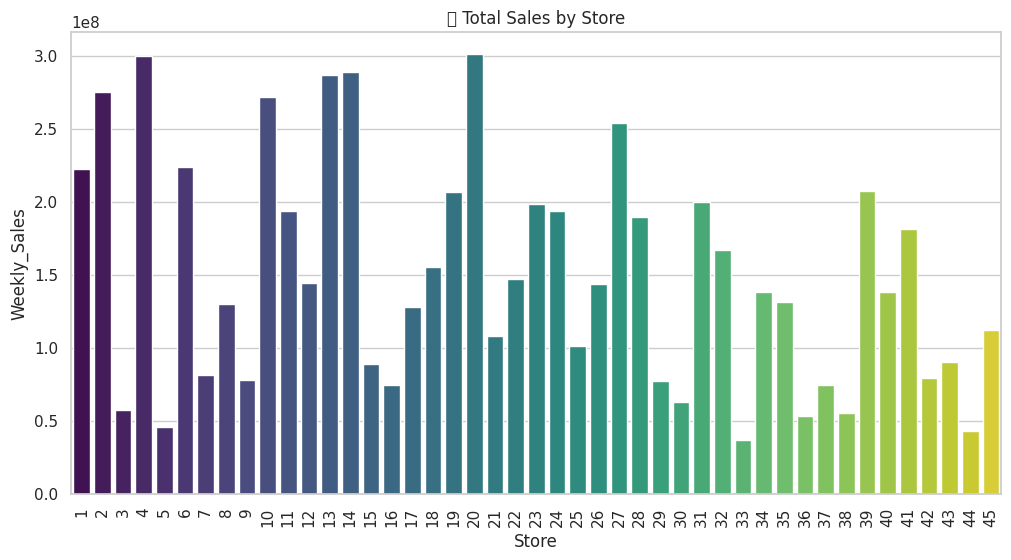

In [ ]:
# Sales by Store
store_sales = train_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=store_sales, x='Store', y='Weekly_Sales', palette='viridis')
plt.title('🔹 Total Sales by Store')
plt.xticks(rotation=90)
plt.savefig("sales_by_store.png", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-53-760087598.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_sales, x='Dept', y='Weekly_Sales', palette='cubehelix')


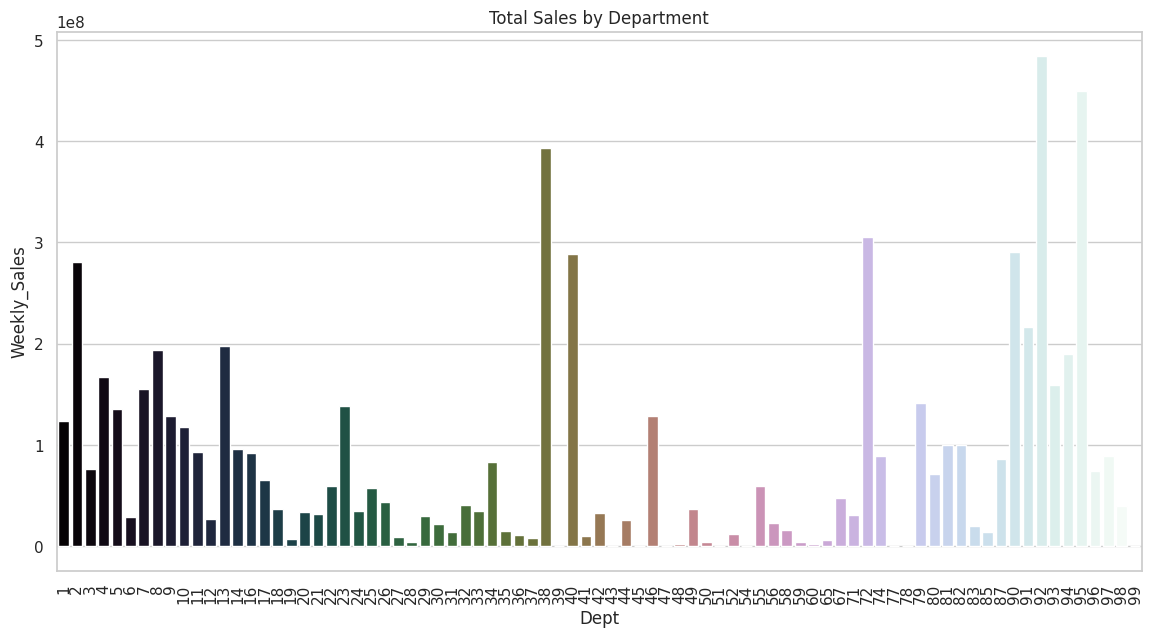

In [ ]:
# Sales by Department
dept_sales = train_df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=dept_sales, x='Dept', y='Weekly_Sales', palette='cubehelix')
plt.title('Total Sales by Department')
plt.xticks(rotation=90)
plt.savefig("sales_by_dept.png", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-54-1179601408.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("sales_trend.png", bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


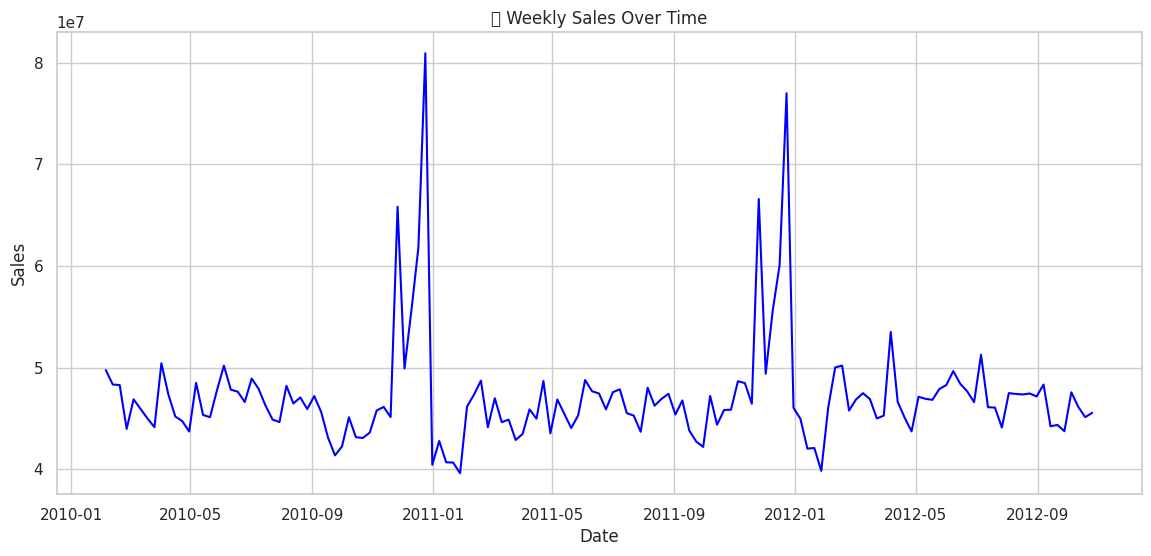

In [ ]:
# Sales Trend Over Time
weekly_trend = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_trend, x='Date', y='Weekly_Sales', color='blue')
plt.title("📈 Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.savefig("sales_trend.png", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-55-4254896932.py:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig("markdown_impact.png", bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


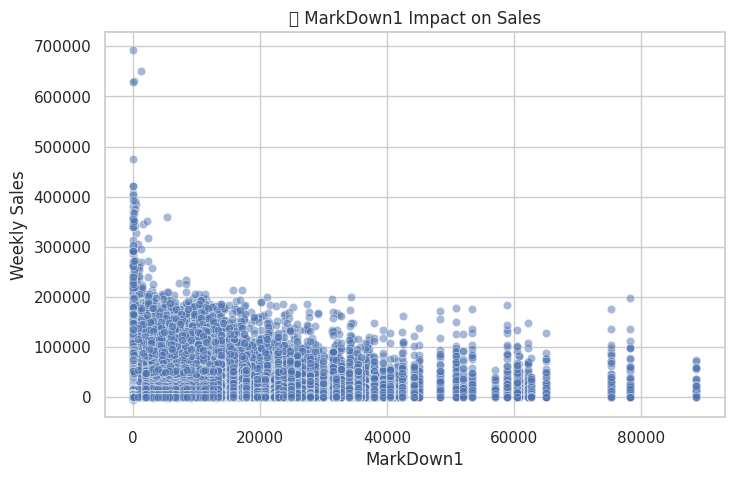

In [ ]:
# MarkDown Impact
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='MarkDown1', y='Weekly_Sales', alpha=0.5)
plt.title("📦 MarkDown1 Impact on Sales")
plt.xlabel("MarkDown1")
plt.ylabel("Weekly Sales")
plt.savefig("markdown_impact.png", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-56-3524445999.py:4: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig("markdown2.png", bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


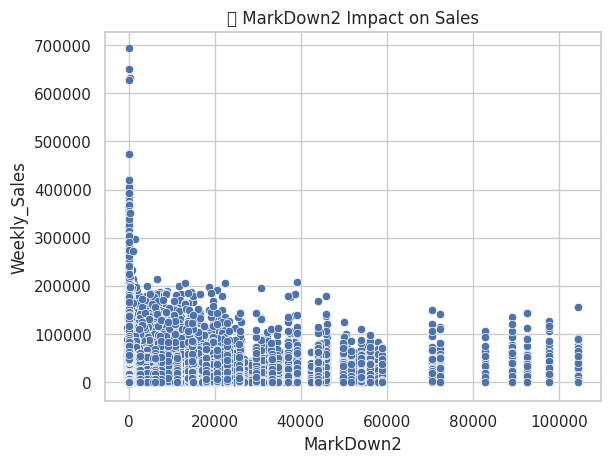

In [ ]:
# MarkDown2 vs Sales
sns.scatterplot(data=train_df, x='MarkDown2', y='Weekly_Sales')
plt.title("📦 MarkDown2 Impact on Sales")
plt.savefig("markdown2.png", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-57-2308296135.py:4: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig("markdown3.png", bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


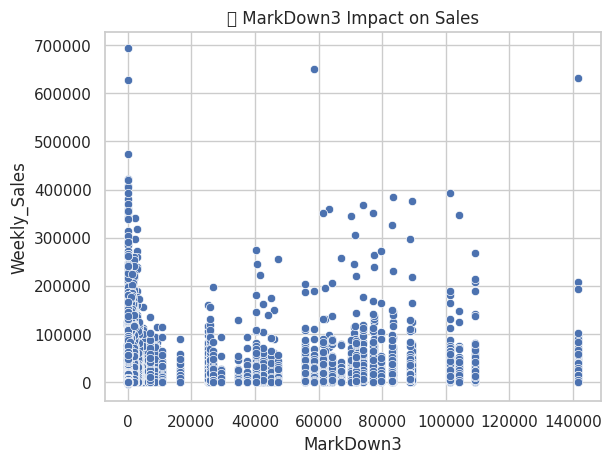

In [ ]:
# MarkDown3 vs Sales
sns.scatterplot(data=train_df, x='MarkDown3', y='Weekly_Sales')
plt.title("📦 MarkDown3 Impact on Sales")
plt.savefig("markdown3.png", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-58-1689244248.py:4: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig("markdown4.png", bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


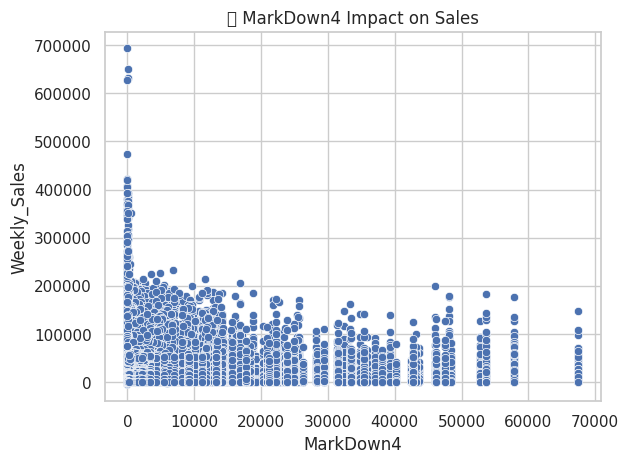

In [ ]:
# MarkDown4 vs Sales
sns.scatterplot(data=train_df, x='MarkDown4', y='Weekly_Sales')
plt.title("📦 MarkDown4 Impact on Sales")
plt.savefig("markdown4.png", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-59-2674127891.py:5: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig("markdown_correlation.png", bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


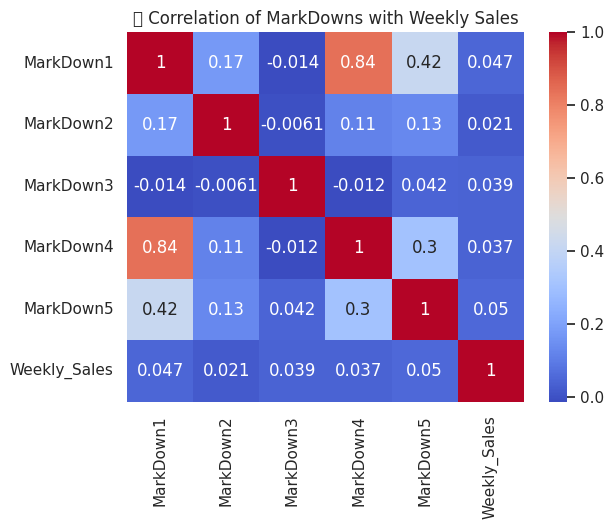

In [ ]:
# Correlation between the Markdowns

markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
correlation = train_df[markdown_cols + ['Weekly_Sales']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("🔍 Correlation of MarkDowns with Weekly Sales")
plt.savefig("markdown_correlation.png", bbox_inches='tight', dpi=300)
plt.show()

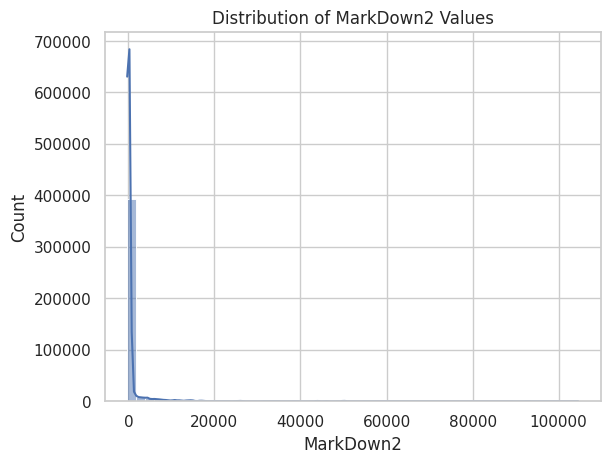

In [ ]:
sns.histplot(train_df['MarkDown2'], bins=50, kde=True)
plt.title("Distribution of MarkDown2 Values")
plt.savefig("markdown2_distribution.png", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-61-2337959433.py:5: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.savefig(f"{col}_applied.png", bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


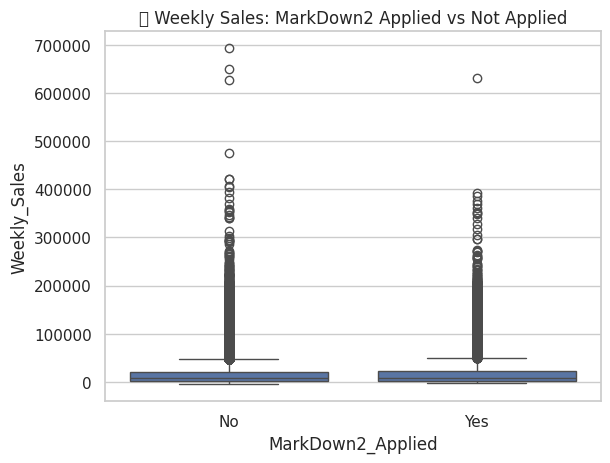

/tmp/ipython-input-61-2337959433.py:5: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.savefig(f"{col}_applied.png", bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


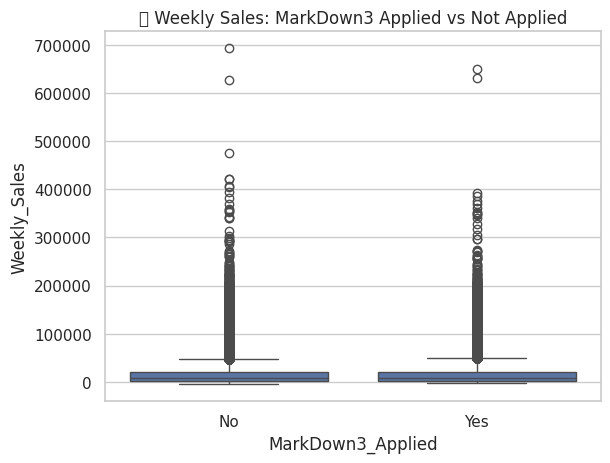

/tmp/ipython-input-61-2337959433.py:5: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.savefig(f"{col}_applied.png", bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


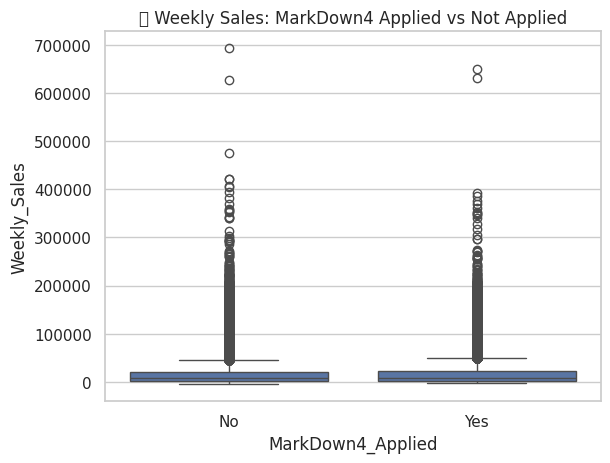

In [ ]:
for col in ['MarkDown2', 'MarkDown3', 'MarkDown4']:
    train_df[f'{col}_Applied'] = train_df[col].apply(lambda x: 'Yes' if x > 0 else 'No')
    sns.boxplot(data=train_df, x=f'{col}_Applied', y='Weekly_Sales')
    plt.title(f"💡 Weekly Sales: {col} Applied vs Not Applied")
    plt.savefig(f"{col}_applied.png", bbox_inches='tight', dpi=300)
    plt.show()

/tmp/ipython-input-62-3358889245.py:7: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.savefig("temperature.png", bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


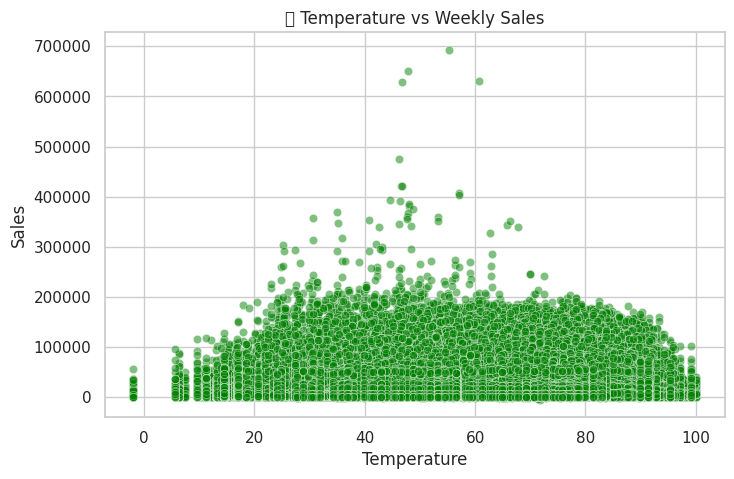

In [ ]:
#  Temperature vs Weekly Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='Temperature', y='Weekly_Sales', alpha=0.5, color='green')
plt.title("🌡️ Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.savefig("temperature.png", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-63-2848780910.py:7: UserWarning: Glyph 9981 (\N{FUEL PUMP}) missing from font(s) DejaVu Sans.
  plt.savefig("fuel_price.png", bbox_inches='tight', dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9981 (\N{FUEL PUMP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


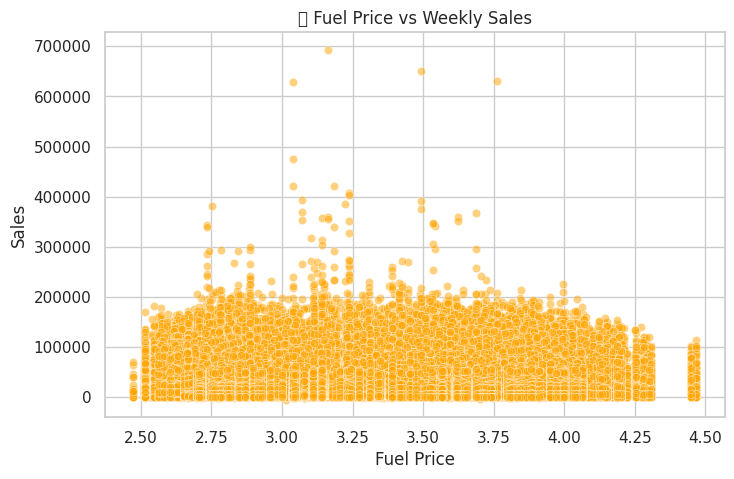

In [ ]:
#  Fuel Price vs Weekly Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='Fuel_Price', y='Weekly_Sales', alpha=0.5, color='orange')
plt.title("⛽ Fuel Price vs Weekly Sales")
plt.xlabel("Fuel Price")
plt.ylabel("Sales")
plt.savefig("fuel_price.png", bbox_inches='tight', dpi=300)
plt.show()

# 📅 Seasonality Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

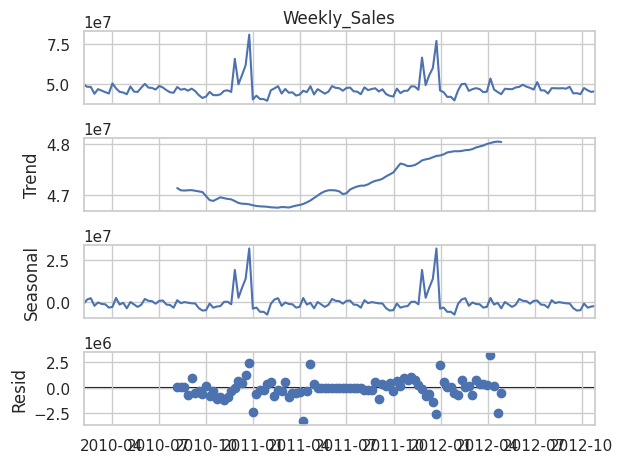

In [ ]:
ts = train_df.groupby('Date')['Weekly_Sales'].sum()
result = seasonal_decompose(ts, model='additive', period=52)
result.plot()
plt.savefig("seasonal_decompose.png", bbox_inches='tight', dpi=300)
plt.show()

# Forecasting with Prophet

In [ ]:
from prophet import Prophet

In [ ]:
# Prepare data
df_prophet = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_prophet.columns = ['ds', 'y']

In [ ]:
# Train model
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp34f3v058/l45wdwpo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp34f3v058/5q4id47p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91698', 'data', 'file=/tmp/tmp34f3v058/l45wdwpo.json', 'init=/tmp/tmp34f3v058/5q4id47p.json', 'output', 'file=/tmp/tmp34f3v058/prophet_modeluwmkicel/prophet_model-20250629094144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:41:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:41:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create future dates
future = model.make_future_dataframe(periods=26, freq='W')

In [ ]:
# Forecast
forecast = model.predict(future)

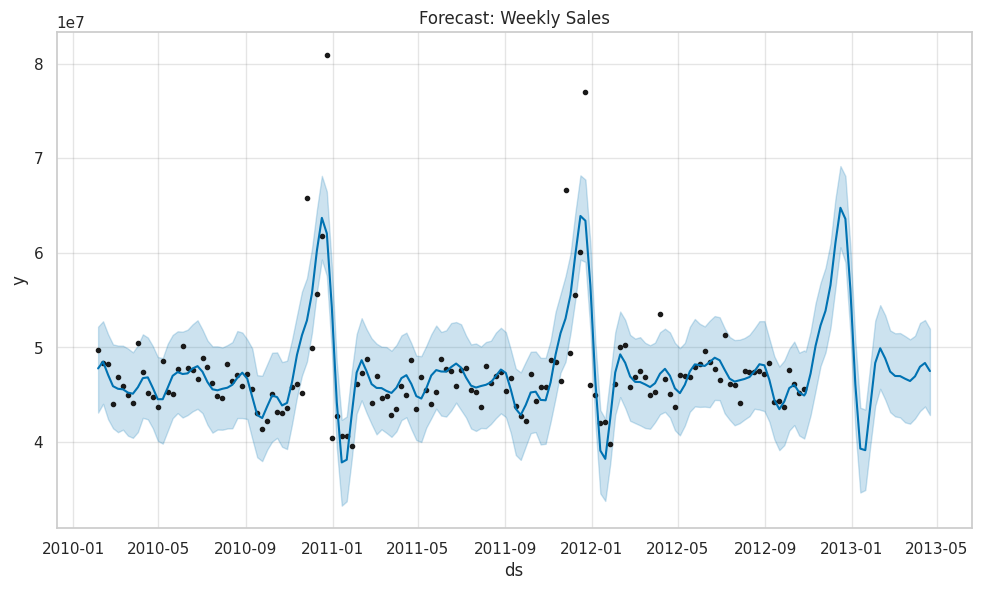

In [ ]:
# Plot
model.plot(forecast)
plt.title("Forecast: Weekly Sales")
plt.savefig("forecast.png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
train_df.to_csv('/content/drive/MyDrive/Data Analytics Projects/walmart_sales_analyzed.csv', index=False)